# Project: Identify Customer Segments


Task: to identify segments of the population that form the core customer base for a main-order sales company. 
This is the sort of information that can be used for directed marketing camnpains, towards either the audience that is already making up a notable portion of the revenue, or even information to focus on groups that are least interested in this company to change that.

data is provided by Bertelsmann Arvato Analytics, and represents a real-life data science task but is a propietry data set anc can not be shared. 

Available data: 

``` 
1- Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
2- Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
3- Detailed information file about the features in the provided datasets.
4- Summary of feature attributes for demographics data; 85 features (rows) x 4 columns 
```


In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline


#Import note: The classroom currently uses sklearn version 0.19.
#If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
#instead of sklearn.impute as in newer versions of sklearn.


In [2]:
from ast import literal_eval
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans

In [3]:
# Load in the general demographics data.
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv", delimiter = ";")

# Load in the feature summary file.
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv", delimiter= ";")

In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [5]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


```






```
### Step 1: Load the Data
```



```

Early investication of the data and the feature description dictionary shows that each row has information on 3 different levels: The person, their local community, and their larger community.
It would be important to undetstand the relatioship of these different columns with each other, specifically since some data are represented in multipe different ways (ie age) or in different levels of detail (fine/large scale categorization).

Next steps are dedicated to understanding the type of data we are dealing with, find and deal with the NaNs and missing data, investigating corelations and reducing the data set.
```






```

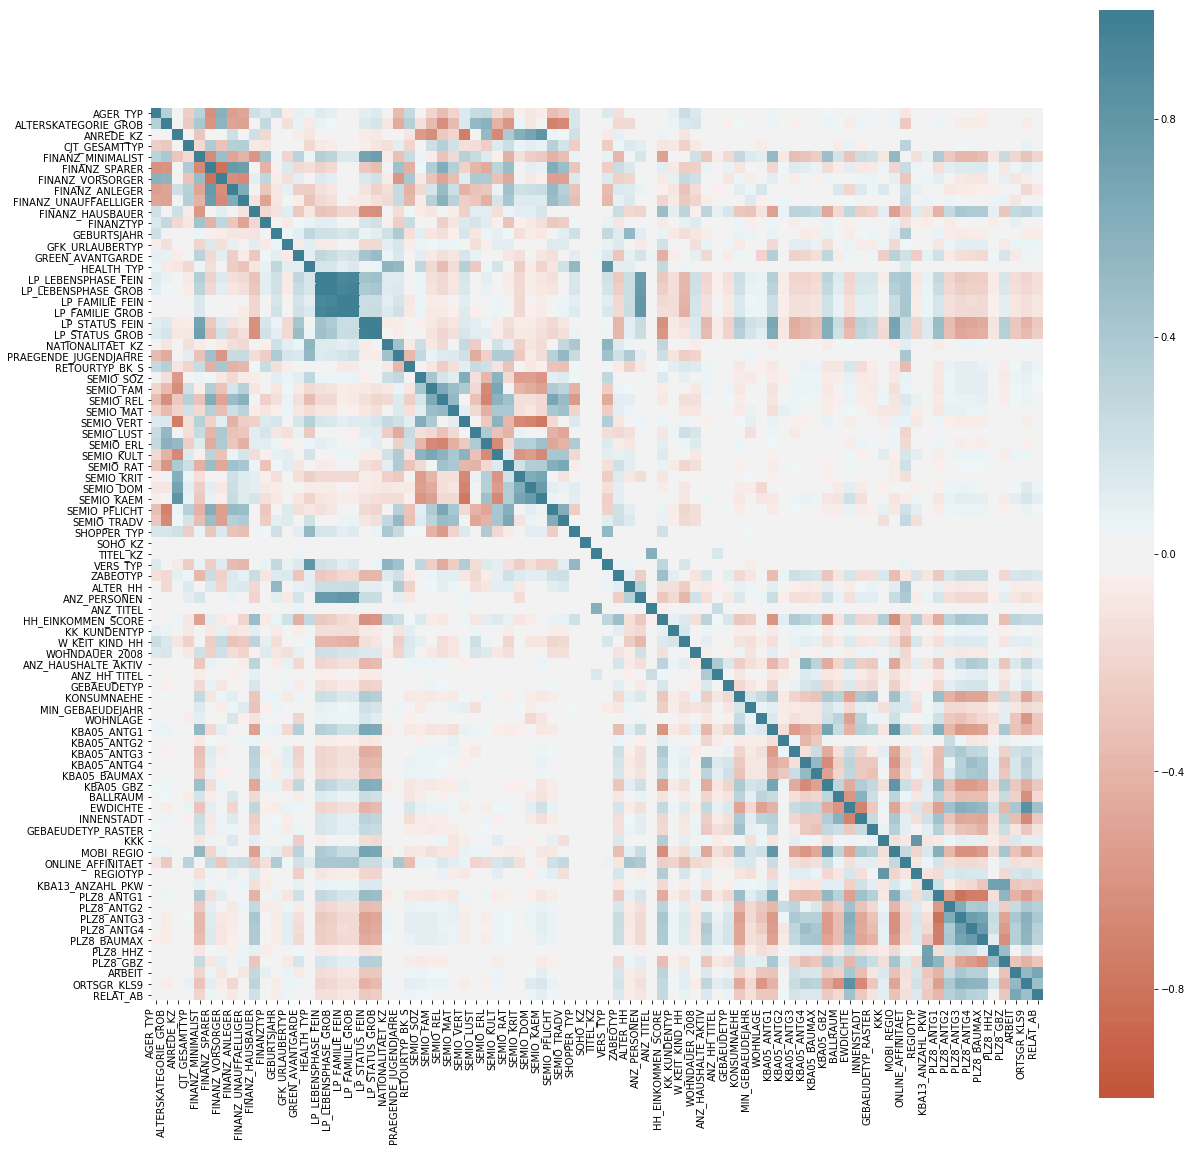

In [6]:
corr = azdias.corr()

fig, ax = plt.subplots(figsize = (20, 20))

sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=ax )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

```






```
## Step 1-1: Preprocessing
```



```

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. Some investigation is needed to fully understand what should be done for each column, but starting point would be to replace the data that is labeled unknown to match the regular NaNs. (ie the ALTERSKATEGORIE_GROB column has labeled missing or unknown as 0, 9 or -1 while the provided data is also an ordinal data set. It would make sense to combine these three labels with the NaNs and then amend the column for all the missing data at once.)


### Step 1.2: Compare missing data per column

Since there are a lot of columns in the data set, it is possible that some columns have a lot of missing data, making them not quite as useful as they could have been. 
In the first pass, I am going to remove those columns with a huge percentage of missing data, but will keep that data handy hoping to comeback and understand if any part of that information is salvageble.
```






```

In [7]:
def replacenan(x, missing_or_unknown):
    if x in missing_or_unknown:
        return np.nan
    else:
        return x

In [8]:
x_column = ['CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CAMEO_INTL_2015']
x_unknown = [[-1,'X'], ['XX'], [-1,'XX']]
for i in range(len(x_column)):
    missing_or_unknown = x_unknown[i]
    col = x_column[i]
    azdias[col]=azdias[col].apply(lambda x : replacenan(x, missing_or_unknown))

    feat_info.loc[feat_info['attribute']==col,'missing_or_unknown'] = '[]'

In [9]:
# Identify missing or unknown data `values and convert them to NaNs.
        
for col in azdias.columns:
    missing_or_unknown = str(feat_info[feat_info['attribute']==col]['missing_or_unknown'].values[0])
    missing_or_unknown = literal_eval(missing_or_unknown)
    if missing_or_unknown:
        azdias[col]=azdias[col].apply(lambda x : replacenan(x, missing_or_unknown))
    #print(col)


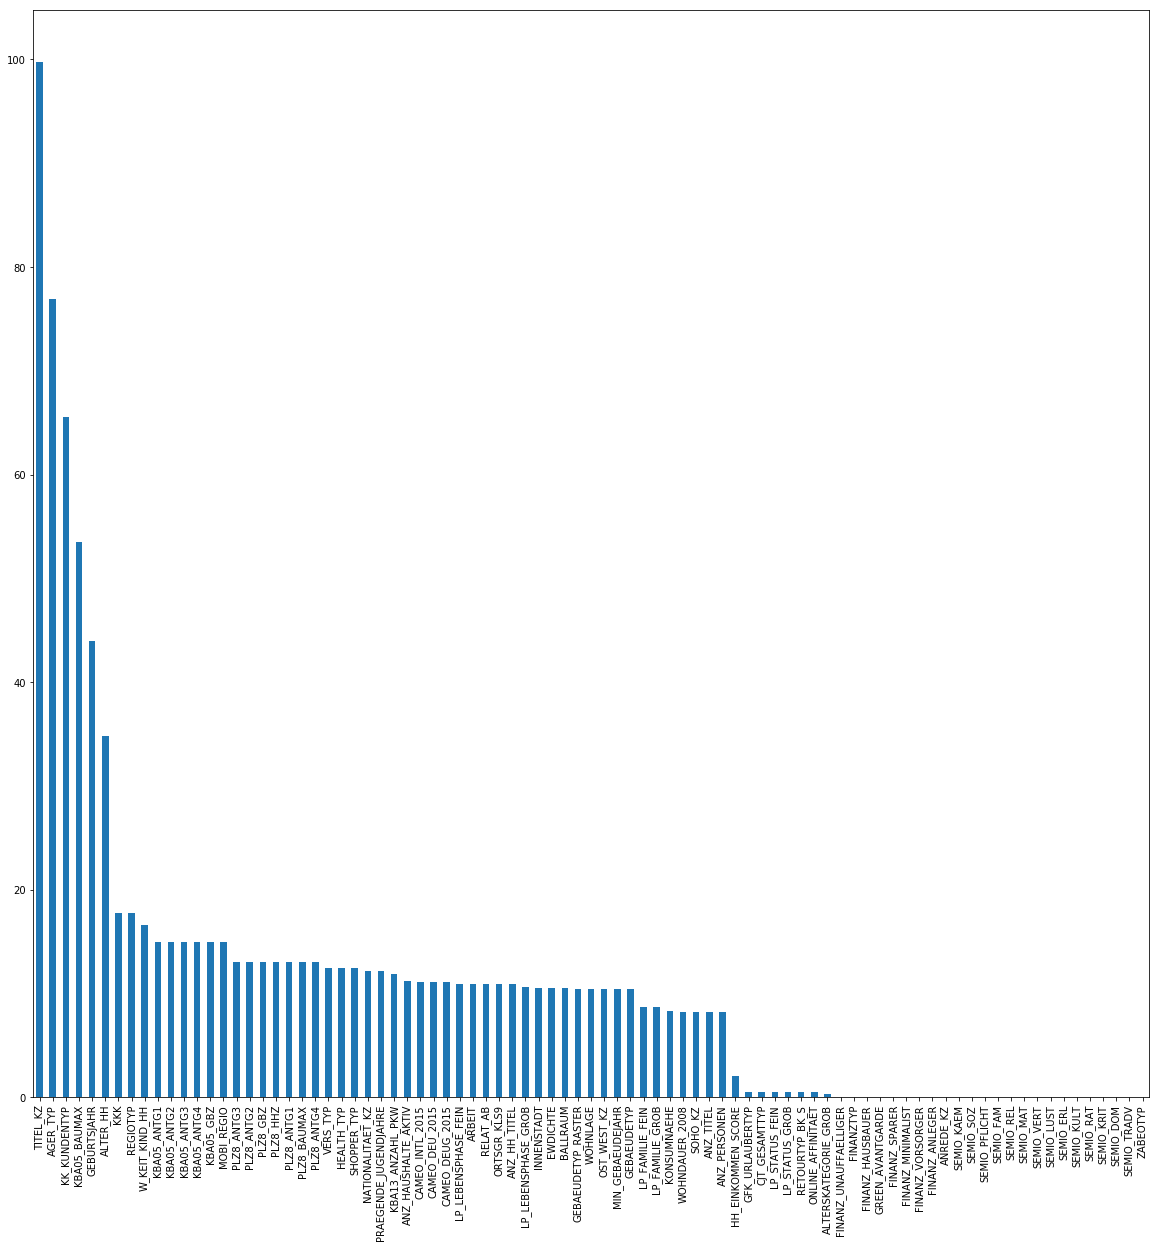

In [10]:
# Perform an assessment of how much missing data there is in each column of the dataset.
fig, ax = plt.subplots(figsize = (20, 20))
nullobj = (azdias.isnull().sum().to_frame() / len(azdias) * 100).sort_values(by = 0, ascending = False)

nullobj.plot(kind = 'bar', ax= ax, legend = False)


```






```
### Step 1.2 continued
### Investigating patterns in the amount of missing data in each column.
```



```

6 columns have more than 30% missing data, which makes sense after investigating what each of those columns represent. Most NaNs are in "TITEL_KZ" column that shows academic titles for each person, and it is understandable that the percentage of Dr.s and Prof.s is less than 1%. 
Next highest missing data is AGER_TYP with 77%, which is the type of elderly person (?), an attribute that would be not applicable for anyone who is not in the defined elderly age group. My first thought is to see if we can combine this data with the age data, adding groups to the categorical data we have in that column. 
Next up, the "KK_KUNDENTYP" column describes "Consumer pattern over past 12 months" with 66% missing or unknown data. While this could have been a valueble attribute, the large missing bubble deems it not quite useful.
With 53% missing data, next column is "KBA05_BAUMAX", a categorical data describing "Most common building type within the microcell", after that comes "GEBURTSJAHR", year of birth, and with 35% "ALTER_HH", the birthdate of head of household. 

Rest of the columns have less than 20% missing data - still a notable percentage but a number that we can work with untill we know more about their importance.

```






```


In [11]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

high_missing_cols = list(nullobj.iloc[:6, :].index)

high_missing = azdias[high_missing_cols]
azdias = azdias.drop(columns=high_missing_cols)

```





```
### Step 1.3: Assess Missing Data in Each Row
```


```
Similar to columns that were proven to be heavy with missing data, there are rows of people that don't have much to contribute. To perform a successful machine learning process, it would be important to work with the least number of missing data possible. A margin of missing data can be imputed, but I prefer to drop the rows with high numbers of missing data and not mislead the model with them.
```





```

Text(0,0.5,'percent of data with less missing value than x')

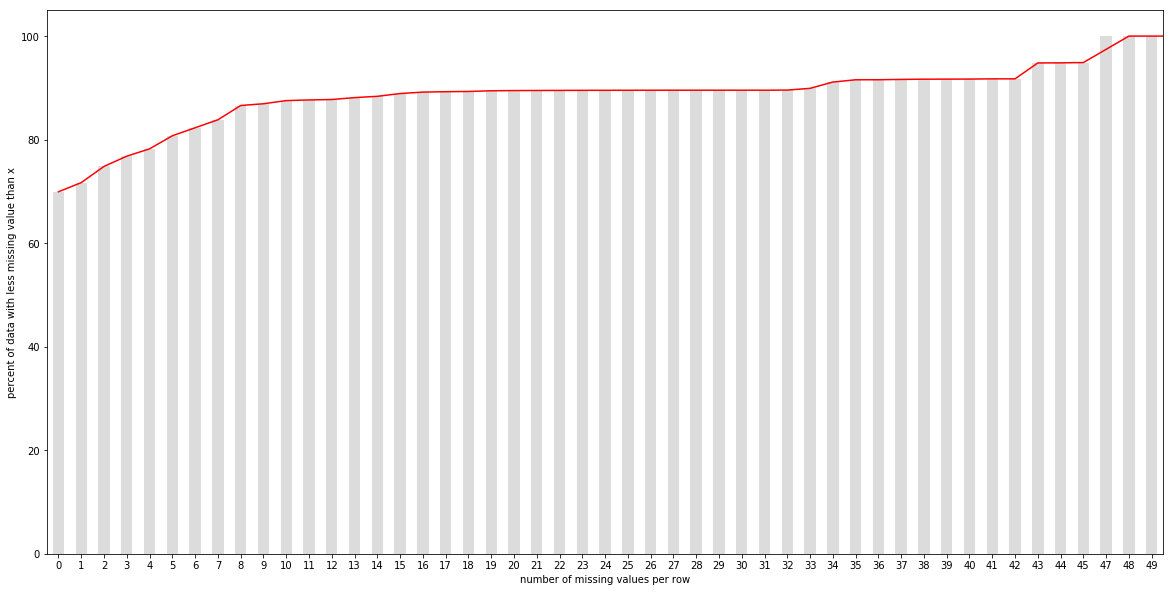

In [12]:
# How much data is missing in each row of the dataset?

rownulls = azdias.isnull().sum(axis = 1).to_frame()
missing_rows_process = (rownulls[0].value_counts().to_frame())/ len(azdias) * 100
fig, ax = plt.subplots(figsize = (20, 10))
missing_rows_process = missing_rows_process.sort_index().cumsum()
missing_rows_process.plot(kind = 'bar', ax=ax, color = '#dcdcdc', legend=False).invert_xaxis
missing_rows_process.plot(kind = 'line',  ax = ax, color = 'red', legend=False)
ax.set_xlabel('number of missing values per row')
ax.set_ylabel('percent of data with less missing value than x')


In [13]:
# Write code to divide the data into two subsets based on the number of missing values in each row.

#from the figure above, seems like rows with less than 16 NaNs make up more than 89% of the input data, thus
#the direction is to only keep rows that have more than 79 - 16 non-NaN entries.

azdias_fullrows = azdias.dropna(thresh = azdias.shape[1] - 16)
azdias_partialrows = azdias[~azdias.index.isin(azdias_fullrows.index)]

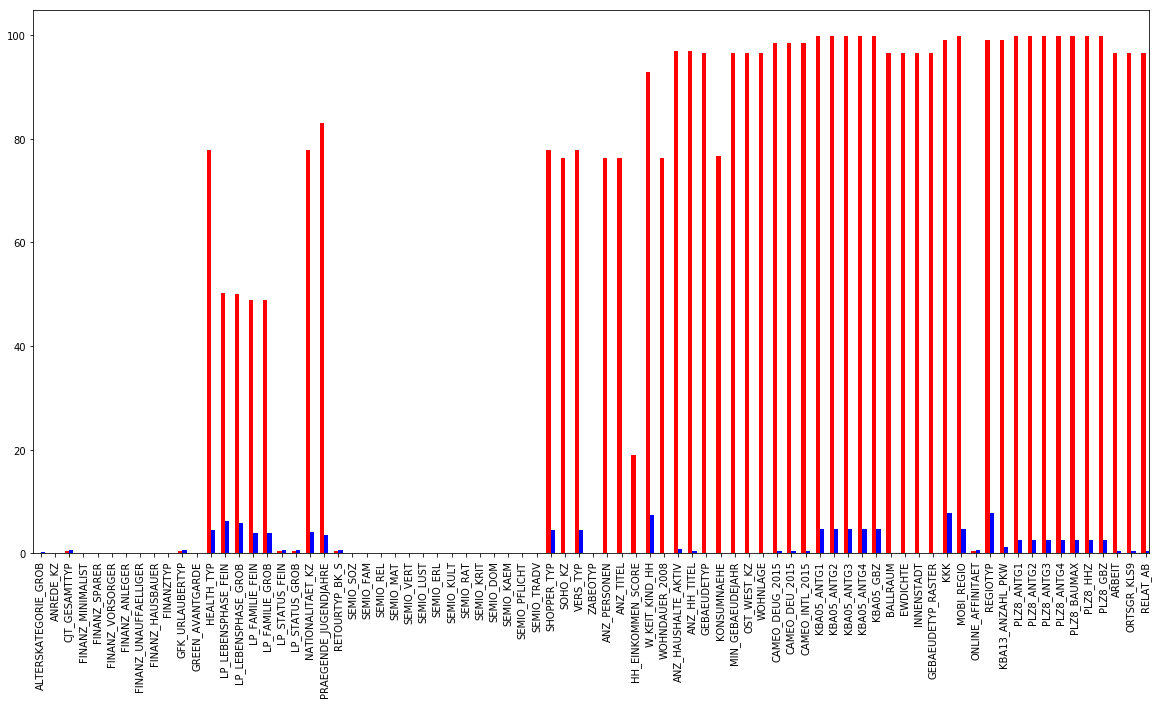

In [14]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
fig, ax = plt.subplots(figsize = (20, 10))

isnull_fullrows = azdias_fullrows.isnull().sum().to_frame()/ len(azdias_fullrows) * 100
isnull_partialrows = azdias_partialrows.isnull().sum().to_frame() / len(azdias_partialrows) * 100

isnull_fullrows.plot(kind = 'bar', ax = ax, color = 'blue', position = 0, width = 0.3, legend=False)
isnull_partialrows.plot(kind = 'bar', ax = ax, color = 'red', position = 1, width = 0.3, legend= False)

#plt.plot(missing_fr)

```





```
### Step 1.3 Continued: Assessing Missing Data in Each Row
```


```
From the graph above, the clean data set has less than 8% missing data for each of the columns and we already know that no entry in it is missing more than 16 attributes. In the rest of the data however, for some columns almost all the entries are missing that value. From this graph one can say that there is definitely a trend, and the data we are putting away are quite similar in the features that they are missing.


### Step 1.4: Re-Encodeing Features
```


```
Next step would be to encode the categorical data. Since the features read_me file has the type of data recorded in it, it would be easier to single them out from the rest of the data.
Depending on the type of information, the strategy is to do either of the following:
- For binary (two-level) categoricals that take numeric values like gender, convert them to 0 and 1.
- For multi-level categoricals (three or more values), decide whether the data should be encoded or dropped. 

```






```

In [15]:
# How many features are there of each data type?

feat_info['type'].value_counts()

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

In [16]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

cat_cols = list(feat_info[feat_info['type'] == 'categorical']['attribute'])
cat_cols = [item for item in cat_cols if item in azdias_fullrows.columns]
cat_cols_type = {col: azdias_fullrows[col].unique() for col in cat_cols}

binary_cols = [k for k,v in cat_cols_type.items() if len(v) <= 3]
dense_cols = [k for k,v in cat_cols_type.items() if len(v) >3]
dense_cols = [item for item in dense_cols if item not in ['LP_FAMILIE_GROB', 'LP_STATUS_GROB']]

In [17]:
azdias_dense_cols = azdias_fullrows[dense_cols]
azdias_clean = azdias_fullrows.drop(columns=dense_cols)


In [18]:
# Re-encode categorical variable(s) to be kept in the analysis.
col = 'ANREDE_KZ'
azdias_clean.loc[azdias_clean[col] == 2, col] = 0
col = 'VERS_TYP'
azdias_clean.loc[azdias_clean[col] == 2, col] = 0
col = 'OST_WEST_KZ'
azdias_clean.loc[azdias_clean[col] == 'O', col] = 0
azdias_clean.loc[azdias_clean[col] == 'W', col] = 1



```




```
### Step 1.4 Continued: Re-Encoding Features 
```

```
From the columns in data set, ANREDE_KZ (male or female, with no unknowns or other gender categories), GREEN_AVANTGARDE (membership in environmental sustainability as part of youth ), SOHO_KZ (having or not having a small/home office), VERS_TYP (insurance type), and finally OST_WEST_KZ (location of building via former east/west germany) are all binary style information. A simple encoding has been applied to these columns.

from the rest of the columns, 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'CAMEO_DEUG_2015', and 'CAMEO_DEU_2015' have too many unique values, hence computationaly expensive to work with. There are several other columns that need further study as they have multiple categories but it's not possible to do onehutencoding on them since they include NaN items, so for now, we will drop these and will come back to them in later stages if need be.
```


```
### Step 1.5: Mixed-Type Features
```

```
There are 7 features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. The two digit code can be broken to 'tens'-place and 'ones'-place digits into two new ordinal variables.

```




```

In [19]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

# function will return the deacde as an integer (40s as 4) and a 
# booliean for whether or not they are Avantgarde (False = Mainstream)

pj_dict = {'1':[4, 0], '2':[4, 1], '3':[5, 0],'4':[5,1],'5':[6, 0],
           '6':[6, 1],'7':[6, 1],'8':[7, 0],'9':[7, 1],'10':[8, 0],
           '11':[8, 1],'12':[8, 0],'13':[8, 1],'14':[9, 0],'15':[9, 1],
          }

def PJ(pj):
    try:
        pj = str(int(pj))
        return pj_dict[str(int(pj))]
    except:
        return [np.nan, np.nan]

azdias_clean['Avantgarde'] = azdias_clean['PRAEGENDE_JUGENDJAHRE'].apply(lambda x : PJ(x)[1])
azdias_clean['PRAEGENDE_JUGENDJAHRE'] = azdias_clean['PRAEGENDE_JUGENDJAHRE'].apply(lambda x : PJ(x)[0])

In [20]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

azdias_clean['CAMEO_INTL_2015'] = azdias_clean['CAMEO_INTL_2015'].fillna(66)
azdias_clean['family_stage'] = azdias_clean['CAMEO_INTL_2015'].apply(lambda x : int(x)//10)
azdias_clean['CAMEO_INTL_2015'] = azdias_clean['CAMEO_INTL_2015'].apply(lambda x : int(x)%10)

In [21]:
azdias_clean = azdias_clean.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB'], axis=1)


```




```
### Step 1.5 continued: Mixed-Type Features
```

```
'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB' were droped because previously the heatmap from feature corelatoins had shown that these two columns were closely mirrored by other columns in the data set, hence we did not actually need them. 
The other two columns (PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015) were each broken down to the two sets of data they represented.
```

```
### Step 1.6: Finialize data cleaning
```

```
This last step is to make sure everything is in place, no weird / non numeric columns are left behind, data is ready to be processed, and most importantly that the cleaning process can be made into a function and applied to our destination data set (the Customer Data)
```





```





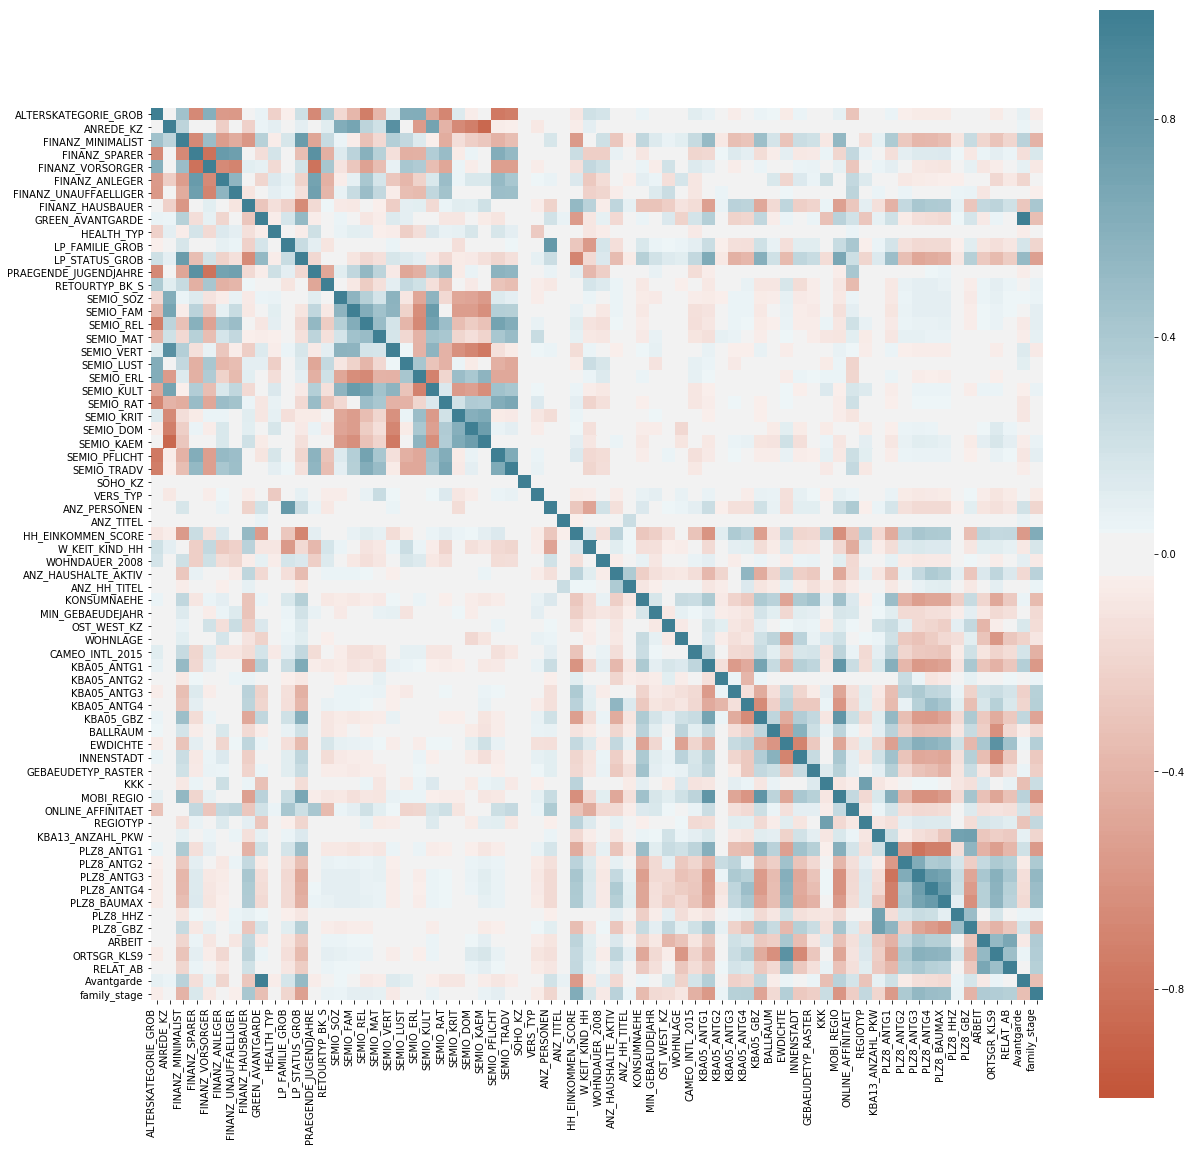

In [22]:
corr = azdias_clean.corr()

fig, ax = plt.subplots(figsize = (20, 20))

sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=ax )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [23]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

# There are a few columns that are represented in the data set by other columns already. Looking at the correlation 
# matrix with a 0.8 threshold in either direction, we can find the list of those columns.

dup_list = []

for col in corr.columns:
    for row, value in zip(corr.index, corr[col]):
        #print (col )
        if (value > 0.8 and value <1 ):
            dup_list.append([col, row])
            print(col, " , ", row)
        if value < -0.8:
            dup_list.append([col, row])
            print(col, " , ", row)

ANREDE_KZ  ,  SEMIO_VERT
ANREDE_KZ  ,  SEMIO_KAEM
FINANZ_SPARER  ,  FINANZ_VORSORGER
FINANZ_SPARER  ,  PRAEGENDE_JUGENDJAHRE
FINANZ_VORSORGER  ,  FINANZ_SPARER
FINANZ_VORSORGER  ,  PRAEGENDE_JUGENDJAHRE
PRAEGENDE_JUGENDJAHRE  ,  FINANZ_SPARER
PRAEGENDE_JUGENDJAHRE  ,  FINANZ_VORSORGER
SEMIO_VERT  ,  ANREDE_KZ
SEMIO_KAEM  ,  ANREDE_KZ
KBA05_ANTG1  ,  MOBI_REGIO
KBA05_GBZ  ,  MOBI_REGIO
EWDICHTE  ,  ORTSGR_KLS9
MOBI_REGIO  ,  KBA05_ANTG1
MOBI_REGIO  ,  KBA05_GBZ
ORTSGR_KLS9  ,  EWDICHTE


In [24]:
#reducing the list of correlated data to list of columns that we can drop
dup_list = ['SEMIO_VERT', 'SEMIO_KAEM', 'FINANZ_VORSORGER', 'PRAEGENDE_JUGENDJAHRE', 'KBA05_ANTG1', 'KBA05_GBZ', 'ORTSGR_KLS9']

azdias_clean_drop = azdias_clean.drop(dup_list, axis=1)


In [26]:
cols_to_remove = high_missing_cols + dense_cols + ['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB'] + dup_list
cols_to_remove

['TITEL_KZ',
 'AGER_TYP',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX',
 'GEBURTSJAHR',
 'ALTER_HH',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_STATUS_FEIN',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'SEMIO_VERT',
 'SEMIO_KAEM',
 'FINANZ_VORSORGER',
 'PRAEGENDE_JUGENDJAHRE',
 'KBA05_ANTG1',
 'KBA05_GBZ',
 'ORTSGR_KLS9']

In [27]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    
    x_column = ['CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CAMEO_INTL_2015']
    x_unknown = [[-1,'X'], ['XX'], [-1,'XX']]
    
    for i in range(len(x_column)):
        missing_or_unknown = x_unknown[i]
        col = x_column[i]
        df[col]=df[col].apply(lambda x : replacenan(x, missing_or_unknown))

    for col in df.columns:
        if col not in x_column:
            try:
                missing_or_unknown = str(feat_info[feat_info['attribute']==col]['missing_or_unknown'].values[0])
                missing_or_unknown = literal_eval(missing_or_unknown)
                if missing_or_unknown:
                    df[col]=df[col].apply(lambda x : replacenan(x, missing_or_unknown))
            except:
                pass

    # select, re-encode, and engineer column values.
    col = 'ANREDE_KZ'
    df.loc[df[col] == 2, col] = 0
    col = 'VERS_TYP'
    df.loc[df[col] == 2, col] = 0
    col = 'OST_WEST_KZ'
    df.loc[df[col] == 'O', col] = 0
    df.loc[df[col] == 'W', col] = 1
    
    df['Avantgarde'] = df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x : PJ(x)[1])
    df['PRAEGENDE_JUGENDJAHRE'] = df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x : PJ(x)[0])
    df['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].fillna(66)
    df['family_stage'] = df['CAMEO_INTL_2015'].apply(lambda x : int(x)//10)
    df['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].apply(lambda x : int(x)%10)
    
    # remove selected columns and rows, ...
    df = df.drop(columns=cols_to_remove)
    
    # Return the cleaned dataframe.
    return df
    

```




```
## Step 2: Processing Data
```

```
### Step 2.1: Feature Scaling
```

```
First step to scale the features would be to deal with all the NaNs and missing data. After that, a Standard Scaler will be applied to the data (with a mean of 0 and std of 1, which are the default features of sklearn's Standard Scaler.
```

```
### Step 2.2: Reducing the dimension of data
```

```
Sklearn's PCA technique will help with finding a balance between the dimension (volume) of our data and the varience (usefulness if the data). I will run tests with a few different numbers to find the minimum number of elements that preserves close to 90% of the varience. 

```




```



In [29]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

azdias_clean_drop_NA = azdias_clean_drop.apply(lambda x: x.fillna(x.median()),axis=0)

In [30]:
# Apply feature scaling to the general population demographics data.

scaler = StandardScaler(with_mean=True, with_std=True).fit(azdias_clean_drop_NA)
scaled_data = scaler.transform(azdias_clean_drop_NA)
scaled_data = pd.DataFrame(scaled_data, columns=azdias_clean_drop_NA.columns)

In [33]:
def pca_plot(pca):
    '''
    Creates a plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn 
    OUTPUT:None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    score = np.sum(vals)
    fig, ax = plt.subplots(figsize = (20, 10))

    ax.bar(ind, vals)
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
    
    plt.axhline(y = score, color = 'r', linestyle = '-')
    plt.text(x= num_components/2, y = score , s = str(score))

    plt.title('Explained Variance Per Principal Component')

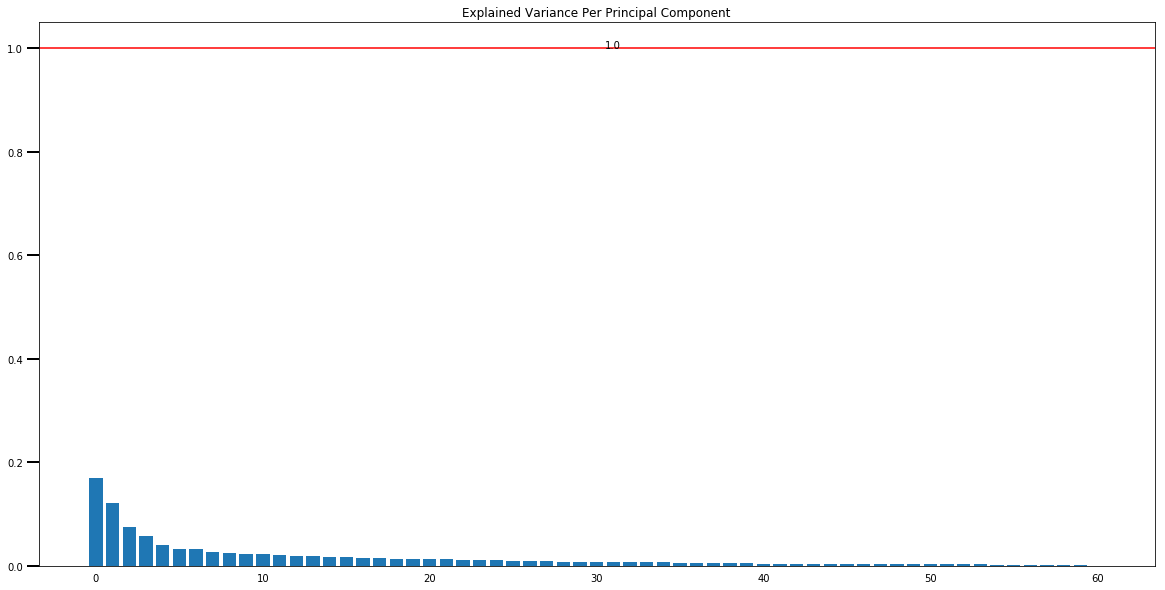

In [34]:
# Apply PCA to the data.
# Investigate the variance accounted for by each principal component.

pca_all = PCA()
new_data = pca_all.fit_transform(scaled_data)
pca_plot(pca_all)

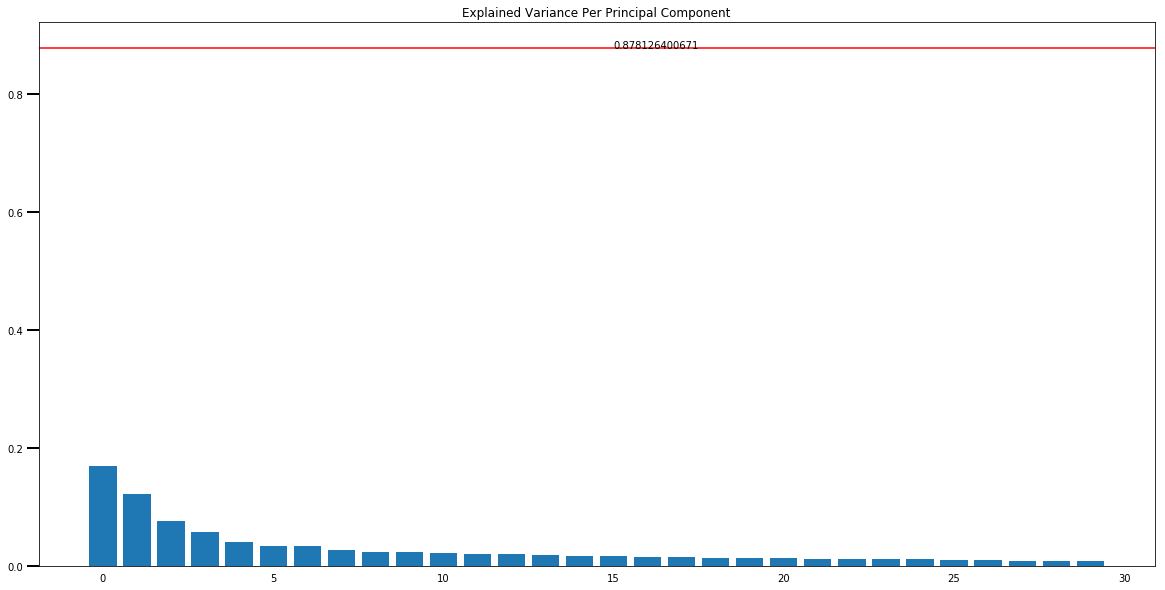

In [35]:
pca_half = PCA(n_components=30)
new_data = pca_half.fit_transform(scaled_data)
pca_plot(pca_half)

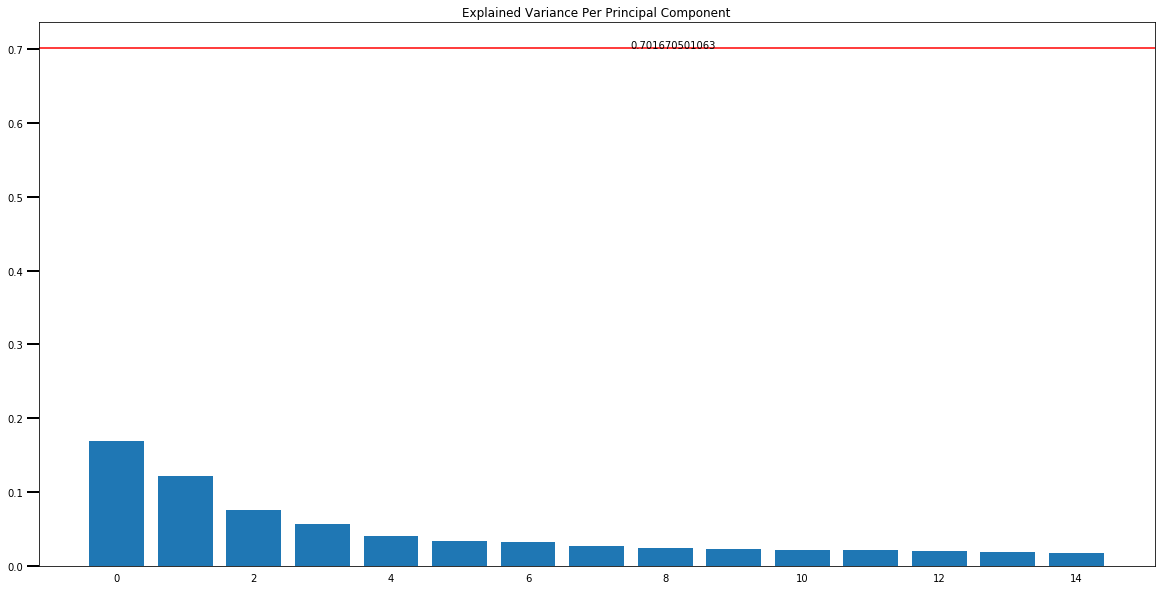

In [37]:
pca_15 = PCA(n_components=15)
new_data = pca_15.fit_transform(scaled_data)
pca_plot(pca_15)

In [38]:
# Re-apply PCA to the data while selecting for number of components to retain.

scaled_data = scaler.transform(azdias_clean_drop_NA)
scaled_data = pd.DataFrame(scaled_data, columns=azdias_clean_drop_NA.columns)

pca_half = PCA(n_components=30)
new_data = pca_half.fit_transform(scaled_data)
#pca_plot(pca_half)

In [40]:
scaled_PCA = pd.DataFrame(new_data)

```




```
### Step 2.3: Understanding the Principal Components
```

```
Since each principal component is a unit vector pointing to a direction in an n-dimensional space, it can also be interpreted as a corelating factor between the different identifiable groups in our data. A visual graph of the weights associated with the first 3 components, followed by a numerical list of the weight of each feature in either of those components can help us understand what each of them can tell us.
```




```

In [42]:
def pca_weights_plot(pca):
    fig, ax = plt.subplots(figsize = (20, 10))
    colors = ['red', 'green', 'blue', 'orange', 'black']
    for i in range(3):
        df = pd.DataFrame(pca.components_, columns= scaled_data.columns)
        weights = df.iloc[i]
        weights.plot(kind = 'bar', ax = ax, position = i, color = colors[i], width = 0.1, legend = False  )
    
    plt.show()

def pca_weights_print(pca, i):
    df = pd.DataFrame(pca.components_, columns= scaled_data.columns)
    weights = df.iloc[i].sort_values(ascending = False)
    return weights

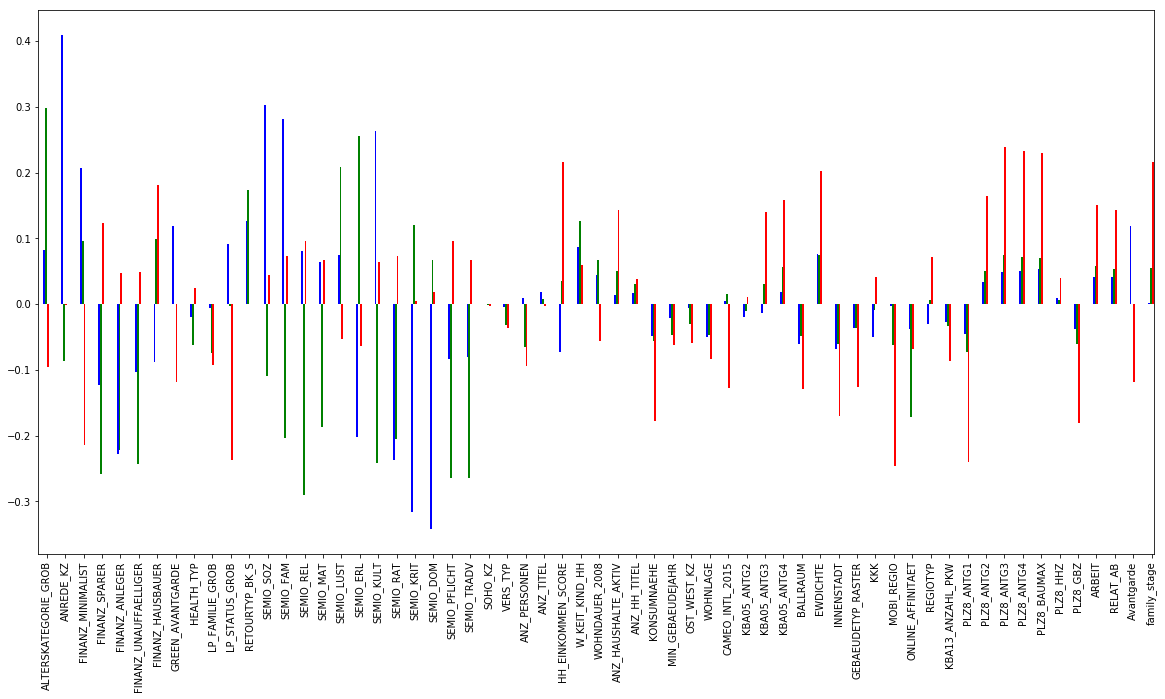

In [43]:
pca_weights_plot(pca_half)

In [44]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.

pca_weights_print(pca_half, 0)

PLZ8_ANTG3               0.239234
PLZ8_ANTG4               0.232507
PLZ8_BAUMAX              0.229429
family_stage             0.216074
HH_EINKOMMEN_SCORE       0.215658
EWDICHTE                 0.201957
FINANZ_HAUSBAUER         0.180725
PLZ8_ANTG2               0.164085
KBA05_ANTG4              0.158069
ARBEIT                   0.150477
ANZ_HAUSHALTE_AKTIV      0.142612
RELAT_AB                 0.142348
KBA05_ANTG3              0.140226
FINANZ_SPARER            0.122737
SEMIO_REL                0.096432
SEMIO_PFLICHT            0.095277
SEMIO_RAT                0.073311
SEMIO_FAM                0.072801
REGIOTYP                 0.070880
SEMIO_MAT                0.067522
SEMIO_TRADV              0.067250
SEMIO_KULT               0.063910
W_KEIT_KIND_HH           0.059009
FINANZ_UNAUFFAELLIGER    0.048690
FINANZ_ANLEGER           0.047422
SEMIO_SOZ                0.044336
KKK                      0.040449
PLZ8_HHZ                 0.039982
ANZ_HH_TITEL             0.037381
HEALTH_TYP    

In [45]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

pca_weights_print(pca_half, 1)

ALTERSKATEGORIE_GROB     0.297923
SEMIO_ERL                0.255379
SEMIO_LUST               0.209189
RETOURTYP_BK_S           0.174162
W_KEIT_KIND_HH           0.126116
SEMIO_KRIT               0.120543
FINANZ_HAUSBAUER         0.099110
FINANZ_MINIMALIST        0.095924
PLZ8_ANTG3               0.074209
EWDICHTE                 0.074053
PLZ8_ANTG4               0.071318
PLZ8_BAUMAX              0.070024
SEMIO_DOM                0.067445
WOHNDAUER_2008           0.067381
ARBEIT                   0.058164
KBA05_ANTG4              0.056403
family_stage             0.055144
RELAT_AB                 0.053908
ANZ_HAUSHALTE_AKTIV      0.050579
PLZ8_ANTG2               0.050415
HH_EINKOMMEN_SCORE       0.035620
KBA05_ANTG3              0.030280
ANZ_HH_TITEL             0.030029
CAMEO_INTL_2015          0.015477
ANZ_TITEL                0.008246
REGIOTYP                 0.006915
PLZ8_HHZ                 0.005624
Avantgarde              -0.000585
GREEN_AVANTGARDE        -0.000585
SOHO_KZ       

In [46]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

pca_weights_print(pca_half, 2)

ANREDE_KZ                0.409248
SEMIO_SOZ                0.302818
SEMIO_FAM                0.281799
SEMIO_KULT               0.263989
FINANZ_MINIMALIST        0.207187
RETOURTYP_BK_S           0.125772
GREEN_AVANTGARDE         0.119340
Avantgarde               0.119340
LP_STATUS_GROB           0.091349
W_KEIT_KIND_HH           0.086643
ALTERSKATEGORIE_GROB     0.081498
SEMIO_REL                0.080999
EWDICHTE                 0.076302
SEMIO_LUST               0.074081
SEMIO_MAT                0.063873
PLZ8_BAUMAX              0.053600
PLZ8_ANTG4               0.050207
PLZ8_ANTG3               0.049049
WOHNDAUER_2008           0.044838
ARBEIT                   0.041384
RELAT_AB                 0.041265
PLZ8_ANTG2               0.034308
KBA05_ANTG4              0.018228
ANZ_TITEL                0.017727
ANZ_HH_TITEL             0.016734
ANZ_HAUSHALTE_AKTIV      0.013823
PLZ8_HHZ                 0.009867
ANZ_PERSONEN             0.008937
CAMEO_INTL_2015          0.004444
family_stage  

```




```
### Step 2.3 continued: Understanding the Principal Components
```

```
from the diagram plotted above, it looks like the first PCA element has a more balanced selection of features compared to the next two. The highest positive values in that element belong to PLZ8_ANTG3 and PLZ8_ANTG4, which respectively corelate with the number of 10+ family homes, and 6-10 family homes in the macro cell that the indiviual lives in. The lowest negative values belong to PLZ8_ANTG1 and MOBI_REGIO, first one representing the 1-2 family houses and the second one the movement patterns. This means that the group of people who stood out of the rest because of highr number of 6-10 and 10+ family homes in their macro unit, are also the group that have very how number of 1-2 family homes around them, and they have reported very high movements in their data.


Second element shows a high corelation between ALTERSKATEGORIE_GROB, SEMIO_ERL, and SEMIO_LUST and an inverse relationship with SEMIO_TRADV and SEMIO_REL, and SEMIO_PFLICHT. The SEMIO group by definition of the read-me file is the personality traits in inverse order, meaning higher numbers show lower affinity with that trait. Hence this group generally translates to older people, who are more traditional, religious and dutiful, and less event oriented and sensual minded.

Third element groups people with high values in ANREDE_KZ, SEMIO_SOZ, SEMIO_FAM and lowest values of SEMIO_KRIT and SEMIO_DOM. This translates to males who are not social minded or family minded, but instead critical mined and dominant.
```




```


## Step 3: Clustering
```

```
### Step 3.1: Clustering the General Population
```

```
We have so far assessed, cleaned and reduced the dempgraphics data and now it's time to understand if we can cluster the data into meaningful groups.
I will test a few different number of clusters (1 to 20, since my CPU can not take larger numbers) to see how they compare, using sklearn's built-in score feature for k-means clustering component.
```




```

In [47]:
def k_scorer(df, k):
    kmeans = KMeans(n_clusters=k).fit(df)
    score = np.abs(kmeans.score(df))
    return score

In [48]:
# Over a number of different cluster counts...
# run k-means clustering on the data and...
# compute the average within-cluster distances.
kmeans_scores = []
k = 20

for i in range(1, k):
    kmeans_scores.append(k_scorer(new_data, i))   
    print(i, ' cluster done, score is', kmeans_scores[i-1])

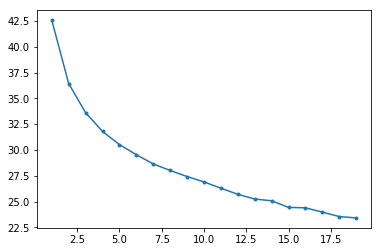

In [49]:
# Investigate the change in within-cluster distance across number of clusters.

kmeans_scores = [int(item/10000)/100 for item in kmeans_scores]
plt.plot(range(1, k), kmeans_scores, linestyle='-', marker='.')
#plt.xlabel('K')
#plt.ylabel('SSE')

In [50]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

k_model_18 = KMeans(n_clusters = 18).fit(new_data)
k_pred_18 = k_model_18.predict(new_data)

In [51]:
k_model_14 = KMeans(n_clusters = 14).fit(new_data)
k_pred_14 = k_model_14.predict(new_data)

In [52]:
k_model_7 = KMeans(n_clusters = 7).fit(new_data)
k_pred_7 = k_model_7.predict(new_data)

```




```
### Step 3.1 continued: Clustering the General Population
```

```
I tried k-means with number of clusters ranging from 1 to 19, but to my surprise, the diagram showing how the score changes in relation to the number of clusters did not have a meaninful elbow showing up - which led to my decicion of continueing the run with 3 different kmean models, with 7, 14 and 16 clusters. From the diagram, number 7 is where the first break shows in the model, and numbers 14 and 18 are also places where a notable shift occurs in the diagram.
```




```
### Step 3.2: Applying the same steps to the Customer Data
```

```
It's time to apply the same steps, from cleaning the data to dealing with the NaNs, Standardizing, applying the PCA and finally applying the clustering to our Customer Data, with the hopes that it will have a differnt size proportion in the clusters than what we see in the general demographic data.
```




```

In [53]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [54]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers_clean = clean_data(customers)
customers_clean = customers_clean.apply(lambda x: x.fillna(x.median()),axis=0)
customers_clean = scaler.transform(customers_clean)
customers_clean = pd.DataFrame(customers_clean, columns=azdias_clean_drop.columns)

In [56]:
customers_pca = pca_half.transform(customers_clean)
customers_pred_14 = k_model_14.predict(customers_pca)
customers_pred_7 = k_model_7.predict(customers_pca)
customers_pred_18 = k_model_18.predict(customers_pca)

In [58]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

Text(0.5,1,'General Clusters, k = 7')

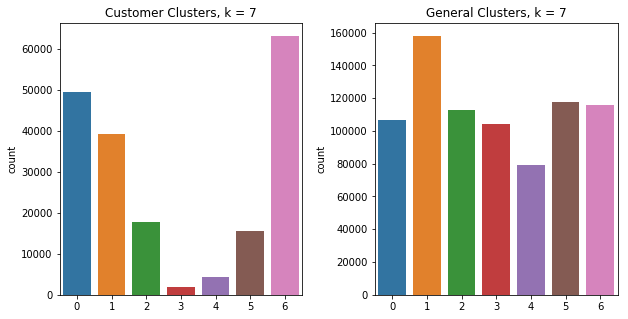

In [59]:
figure, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
figure.subplots_adjust(hspace = 1, wspace=.3)

sns.countplot(customers_pred_7, ax=axs[0])
axs[0].set_title('Customer Clusters, k = 7')
sns.countplot(k_pred_7, ax=axs[1])
axs[1].set_title('General Clusters, k = 7')

Text(0.5,1,'General Clusters, k= 14')

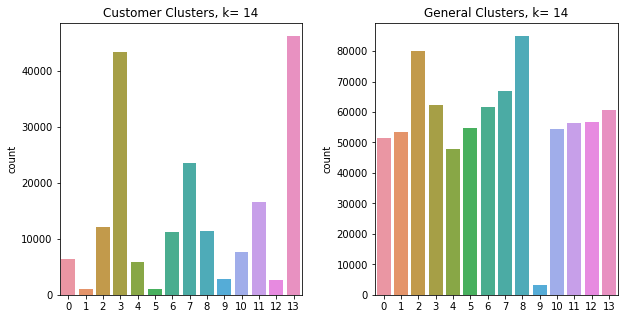

In [86]:
figure, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
figure.subplots_adjust(hspace = 1, wspace=.3)

sns.countplot(customers_pred_14, ax=axs[0])
axs[0].set_title('Customer Clusters, k= 14')
sns.countplot(k_pred_14, ax=axs[1])
axs[1].set_title('General Clusters, k= 14')

Text(0.5,1,'General Clusters, k= 18')

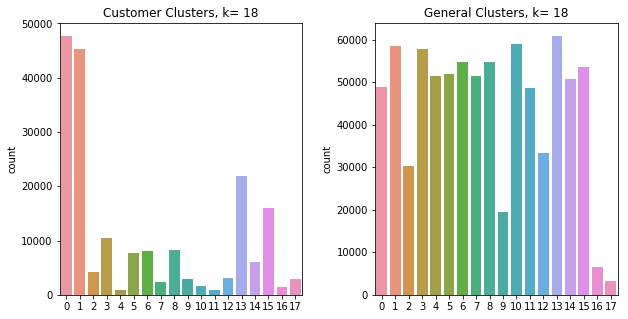

In [87]:
figure, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
figure.subplots_adjust(hspace = 1, wspace=.3)

sns.countplot(customers_pred_18, ax=axs[0])
axs[0].set_title('Customer Clusters, k= 18')
sns.countplot(k_pred_18, ax=axs[1])
axs[1].set_title('General Clusters, k= 18')

In [112]:
general_average = pd.DataFrame(data=azdias_clean_drop_NA.mean(axis=0), index= customers_clean.columns, columns=['General Average'])


In [103]:
#What kinds of people are part of a cluster that is overrepresented in the 
#customer data compared to the general population?

centroid_k18_0 = scaler.inverse_transform(pca_half.inverse_transform(k_model_18.cluster_centers_[0]))
centroid_k18_1 = scaler.inverse_transform(pca_half.inverse_transform(k_model_18.cluster_centers_[1]))

op_1 = pd.DataFrame(data = centroid_k18_0, index = customers_clean.columns, columns= ['centroid_0'])
op_2 = pd.DataFrame(data = centroid_k18_1, index = customers_clean.columns, columns= ['centroid_1'])

In [113]:
overrepresented = pd.concat([op_1, op_2, general_average], axis=1)
overrepresented

,centroid_0,centroid_1,General Average
ALTERSKATEGORIE_GROB,1.702893,3.243538,2.796182
ANREDE_KZ,0.026050,0.931615,0.478584
FINANZ_MINIMALIST,2.739667,4.791255,3.057489
FINANZ_SPARER,3.779141,1.725015,2.715490
FINANZ_ANLEGER,4.357526,1.556787,2.840817
FINANZ_UNAUFFAELLIGER,3.726509,2.236877,2.653742
FINANZ_HAUSBAUER,2.482022,1.885535,3.119770
GREEN_AVANTGARDE,0.237868,0.982202,0.219768
HEALTH_TYP,2.175836,2.091562,2.190935
LP_FAMILIE_GROB,3.249530,2.953174,2.324676


In [105]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
centroid_k18_4 = scaler.inverse_transform(pca_half.inverse_transform(k_model_18.cluster_centers_[4]))
centroid_k18_10 = scaler.inverse_transform(pca_half.inverse_transform(k_model_18.cluster_centers_[10]))

up_1 = pd.DataFrame(data = centroid_k18_4, index = customers_clean.columns, columns= ['centroid_4'])
up_2 = pd.DataFrame(data = centroid_k18_10, index = customers_clean.columns, columns= ['centroid_10'])

In [114]:
underrepresented = pd.concat([up_1, up_2, general_average], axis=1)
underrepresented

,centroid_4,centroid_10,General Average
ALTERSKATEGORIE_GROB,1.670728,1.765152,2.796182
ANREDE_KZ,1.052580,0.043561,0.478584
FINANZ_MINIMALIST,1.897656,1.344344,3.057489
FINANZ_SPARER,4.348962,4.296326,2.715490
FINANZ_ANLEGER,3.586843,4.379741,2.840817
FINANZ_UNAUFFAELLIGER,3.787284,3.959796,2.653742
FINANZ_HAUSBAUER,3.658845,3.954533,3.119770
GREEN_AVANTGARDE,0.132981,0.061208,0.219768
HEALTH_TYP,2.252538,2.249102,2.190935
LP_FAMILIE_GROB,1.886700,1.997917,2.324676


### Final remarks: Compare Customer Data to Demographics Data

comparing the three kmean models above was interesting since each give out a different measure on how the two sets of demographic data compare. The 14-k and 7-k clusters also show interesting trends, but in the end I decided to go with the model with 18 clusters since it shows the biggest contrast between different groups. 

Using the inverse transform on the PCA elements, the overrepresented clusters can be seen in two columns contrasted with the general average. My take on the numbers is as follows:
group 1: mostly females under 45 years old, who are not at all into invesing, are doing slightly better than average in income levels, very social minded, not much religious, lower affinity to the rational, critical or dutiful personality types, more likely to come from households with children, mostly don't live in high density areas (lower number of households in the building) and report very low number of 6+ family houses in their macro cell region.
group 2: mostly over 46 years old, mostly men, higher financial interest than average, lower likeliness to be the money-saver type, much more likely to be part of the green avantgarde movement, more likely to be high earners, less likely to be sensual minded, much more likely than average to be rational minded, much higher household income than average, report higher purchasing power in the region, and are far more likely than the average to be an Avantgarde (ref. CAMEO_DEU_2015)

for the underrepresented group, I picked centroids 10 and 4. while centroids 11 and 16 also show very low numbers, they also represent smaller groups from the general public. Comparing the chosen centroids to the averages from data set, it looks like these two groups are less likely to be a customer of our client's:
group 1: mostly younger men, single, lower income, much less likely to be socially-minded, family minded, religious, or culturally minded, more likely to be sensual minded and event oriented, far more dominant than average, more likely to live in buildings with higher number of households, higher movement levels in their region, reportedly higher number of 5+ family homes in their region, and come from less affluent households and live closer to city center than most.
group 2: younger women, less interested in finances than the average person, less likely to be a money sparer, much more likely to be socially minded, much less to report being dominant, rationally minded or critical minded, very unlikely to have a small office or home office, and have less household income than the average.

